Importando bibliotecas e pacotes

In [1]:
#importando bibliotecas e pacotes
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#carregando e analisando conjunto de exemplo: base de dados sobre resistência de concreto
#disponível em https://www.kaggle.com/maajdl/yeh-concret-data

base = pd.read_csv("/content/Concrete.csv")
print(base)
print(base.describe())

#separando cada atributo em um vetor separado
Cimento = base.iloc[:,0].values
Descarte = base.iloc[:,1].values
Cinza = base.iloc[:,2].values
Agua = base.iloc[:,3].values
Plastificador = base.iloc[:,4].values
PedraBruta = base.iloc[:,5].values
PedraFina = base.iloc[:,6].values
Idade = base.iloc[:,7].values
Resistencia = base.iloc[:,8].values

print("Cimento: ",Cimento)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   28  61.89  
2             594.0  

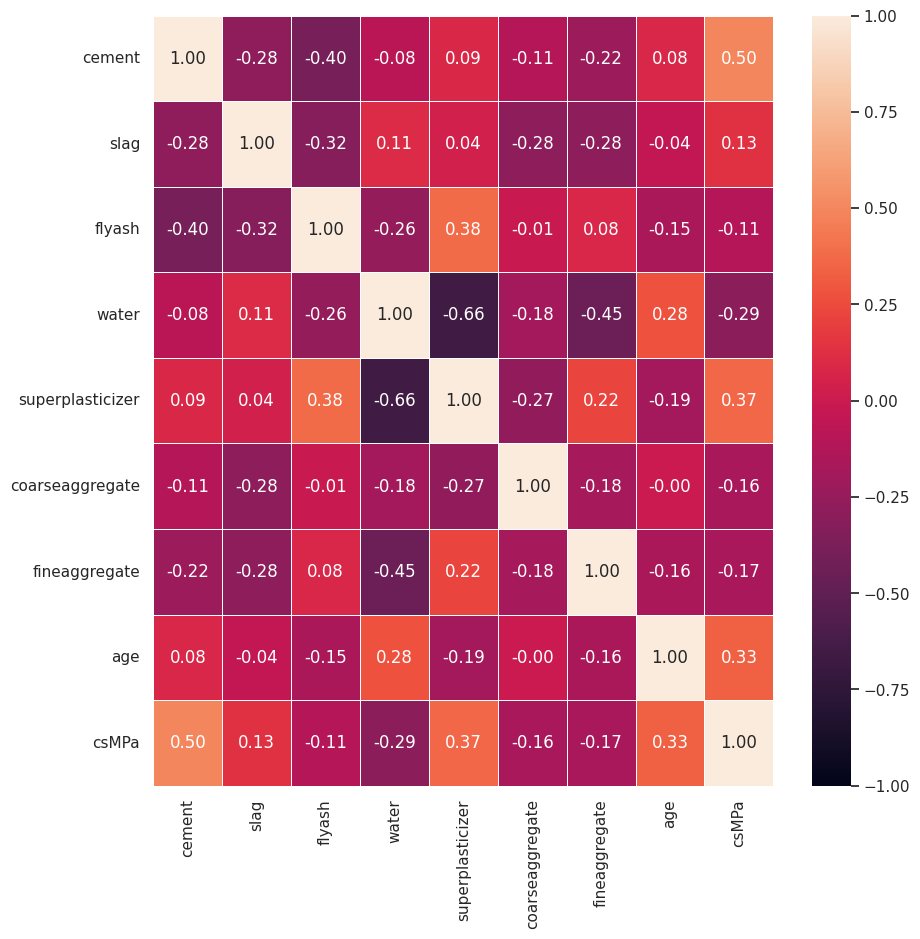

In [3]:
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(10, 10))
sn.set(font_scale=1)
sn.heatmap(base.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
plt.show()


Cimento
b em X:  13.442528112399927
a em X:  [0.07958034]
Coef.Det.:  0.24783661989797423


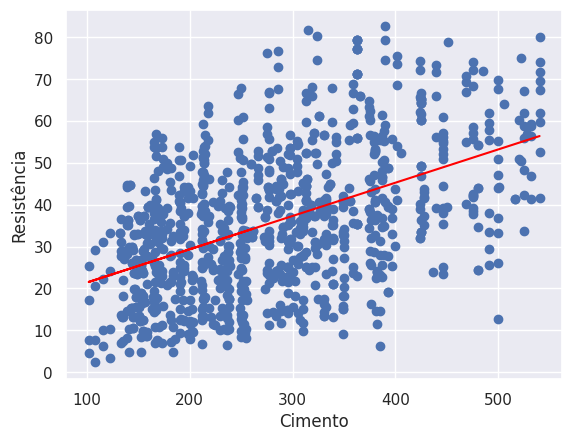

Agua
b em X:  76.95834096883584
a em X:  [-0.22658476]
Coef. Det.:  0.08388749769804549


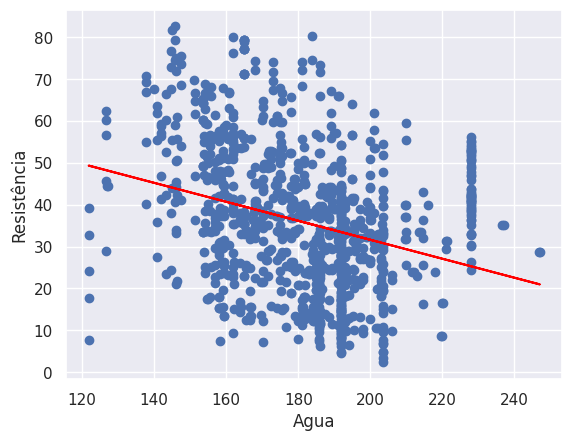

In [4]:
#instanciando e treinando os modelos lineares
Cimento = Cimento.reshape(-1,1) #uma coluna
modelo1 = LinearRegression()
modelo1.fit(Cimento,Resistencia)

print ("Cimento")
print ("b em X: ", modelo1.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo1.coef_) #obtendo a inclinação do modelo
print ("Coef.Det.: ",modelo1.score(Cimento,Resistencia)) #obtendo o coeficiente de determinação do modelo

plt.scatter(Cimento,Resistencia)
plt.xlabel("Cimento") #variável explicativa
plt.ylabel("Resistência") #variável dependente
plt.plot(Cimento, modelo1.predict(Cimento),color='red') #plotando a reta do modelo
plt.show()


Agua = Agua.reshape(-1,1)
modelo2 = LinearRegression()
modelo2.fit(Agua,Resistencia)

print ("Agua")
print ("b em X: ", modelo2.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo2.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",modelo2.score(Agua,Resistencia)) #obtendo o coeficiente de determinação do modelo

plt.scatter(Agua,Resistencia)
plt.xlabel("Agua") #variável explicativa
plt.ylabel("Resistência") #variável dependente
plt.plot(Agua, modelo2.predict(Agua),color='red') #plotando a reta do modelo
plt.show()

In [5]:
#realizando predições com base em variáveis individuais

#cimento
#qual a resistência do concreto com 670 kg de cimento
print("Resistência: ",modelo1.intercept_ + modelo1.coef_ * 670.0," MPa")

#qual a resistência do concreto com 360 kg de cimento
print("Resistência: ",modelo1.intercept_ + modelo1.coef_ * 360.0," MPa")

Resistência:  [66.76135313]  MPa
Resistência:  [42.09144902]  MPa


In [7]:
#avaliando os resíduos dos modelos contruídos
#modelo1 --> cimento
#modelo2 --> agua

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Cimento")
predict = modelo1.predict(Cimento)
print("Erro médio quadrático (MSE): ", mean_squared_error(Resistencia,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(Resistencia,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(Resistencia,predict))

print()
print("Agua")
predict = modelo2.predict(Agua)
print("Erro médio quadrático (MSE): ", mean_squared_error(Resistencia,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(Resistencia,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(Resistencia,predict))



Cimento
Erro médio quadrático (MSE):  209.71131982955583
Raiz quadrada do Erro médio quadrático (RMSE):  14.48141290860653
Erro médio absoluto (MAE):  11.851885742745791

Agua
Erro médio quadrático (MSE):  255.42211579622534
Raiz quadrada do Erro médio quadrático (RMSE):  15.981930915763131
Erro médio absoluto (MAE):  13.075711218900313


In [8]:
#construindo um modelo baseado em múltiplas variáveis explicativas

NovaBase = pd.DataFrame(base,columns=base.columns[:-1])
RegMultipla = LinearRegression().fit(NovaBase, Resistencia)

print ("Todas as variáveis")
print ("b em X: ", RegMultipla.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", RegMultipla.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",RegMultipla.score(NovaBase,Resistencia)) #obtendo o coeficiente de determinação do modelo

predict = RegMultipla.predict(NovaBase)
print("\nAnálise de Resíduos")
print("Erro médio quadrático (MSE): ", mean_squared_error(Resistencia,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(Resistencia,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(Resistencia,predict))


Todas as variáveis
b em X:  -23.331213584903225
a em X:  [ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207]
Coef. Det.:  0.6155198704142721

Análise de Resíduos
Erro médio quadrático (MSE):  107.19723607486016
Raiz quadrada do Erro médio quadrático (RMSE):  10.353609808895648
Erro médio absoluto (MAE):  8.214343706221813


In [9]:
#construindo um modelo de regressão com hold-out
#neste caso será usado 50% para treino e 50% para teste
from sklearn.model_selection import train_test_split

NovaBase = pd.DataFrame(base,columns=base.columns[:-1])

x_treino, x_teste, y_treino, y_teste = train_test_split(NovaBase, Resistencia, test_size=0.5, random_state=10,shuffle=True)
Modelo = LinearRegression().fit(x_treino, y_treino)

print("Modelo construído")
print ("b em X: ", Modelo.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", Modelo.coef_) #obtendo a inclinação do modelo

print ("\n\nTodas as variáveis sobre o conjunto de treino")
print ("Coef. Det. sobre o treino: ",Modelo.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_treino)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_treino,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_treino,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_treino,predict))


print ("\n\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",Modelo.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))



Modelo construído
b em X:  15.83165659542668
a em X:  [ 0.11149033  0.08942652  0.07754677 -0.21645651  0.20811081  0.00740501
  0.00406277  0.12139769]


Todas as variáveis sobre o conjunto de treino
Coef. Det. sobre o treino:  0.6394788731678684
Análise de Resíduos
Erro médio quadrático (MSE):  102.92399326087913
Raiz quadrada do Erro médio quadrático (RMSE):  10.145146290757918
Erro médio absoluto (MAE):  7.906582980777257


Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.5846453894164714
Análise de Resíduos
Erro médio quadrático (MSE):  112.876465556361
Raiz quadrada do Erro médio quadrático (RMSE):  10.624333652345497
Erro médio absoluto (MAE):  8.542281308752951


                      SVR
Coef. Det. sobre o treino:  0.7530658434377092

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.7018600085987922
Análise de Resíduos
Erro médio quadrático (MSE):  81.02230627244842
Raiz quadrada do Erro médio quadrático (RMSE):  9.001239152052811
Erro médio absoluto (MAE):  6.925448037809029






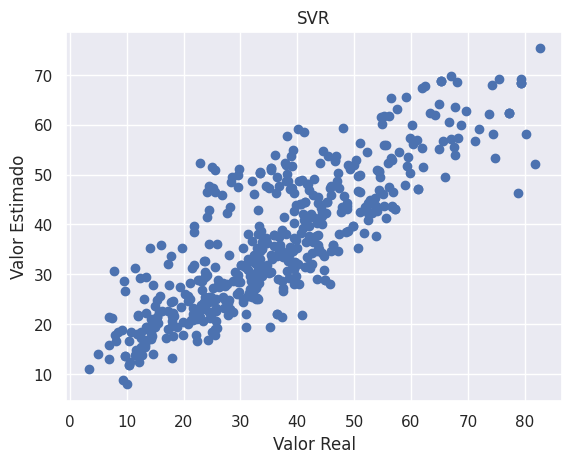

                      KNR
Coef. Det. sobre o treino:  0.9988725617672973

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.6061933316216841
Análise de Resíduos
Erro médio quadrático (MSE):  107.02061252340661
Raiz quadrada do Erro médio quadrático (RMSE):  10.345076728734622
Erro médio absoluto (MAE):  7.782551988701268






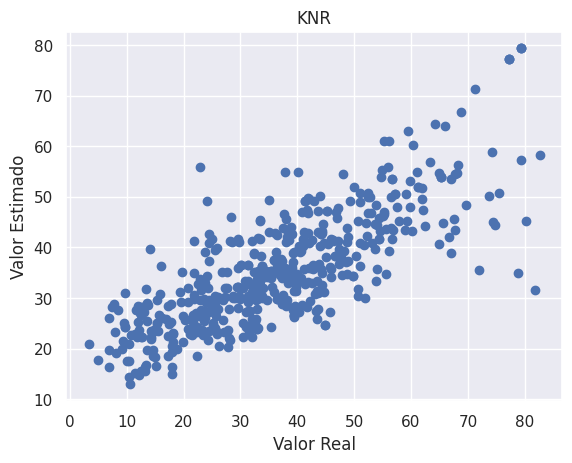

                 RANDOM FOREST
Coef. Det. sobre o treino:  0.9035425475638821

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.8190439899180324
Análise de Resíduos
Erro médio quadrático (MSE):  49.1764731118257
Raiz quadrada do Erro médio quadrático (RMSE):  7.012593893262728
Erro médio absoluto (MAE):  5.388667886237329






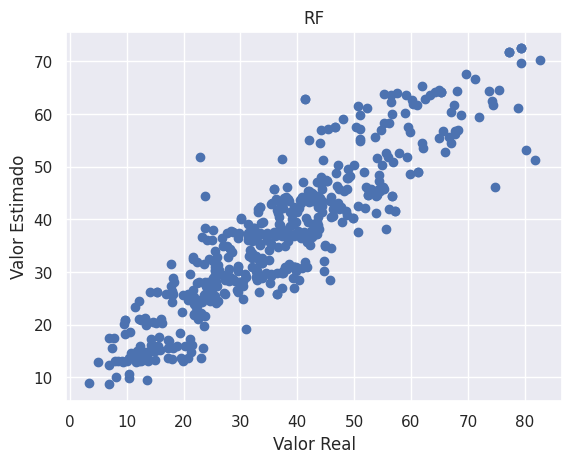

                      MLP
Coef. Det. sobre o treino:  0.8439921179046891

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.8024235484020548
Análise de Resíduos
Erro médio quadrático (MSE):  53.693232157004225
Raiz quadrada do Erro médio quadrático (RMSE):  7.32756659178231
Erro médio absoluto (MAE):  5.721366901016124






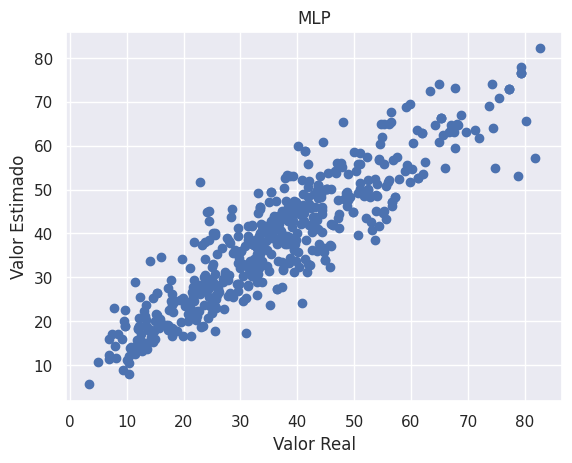

In [13]:
#aplicando modelos de Machine Learning para realizar a estimação

#1º passo, separando treino e teste
#x_treino, x_teste, y_treino, y_teste = train_test_split(NovaBase, Resistencia, test_size=0.5, random_state=10,shuffle=True)

# SVM
from sklearn.svm import SVR
svr = SVR(kernel='poly', C=100)
svr.fit(x_treino,y_treino)
print ("                      SVR")
print ("Coef. Det. sobre o treino: ",svr.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",svr.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = svr.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.title("SVR")
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()


# KNN
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=50,weights='distance')
KNN.fit(x_treino,y_treino)
print ("                      KNR")
print ("Coef. Det. sobre o treino: ",KNN.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",KNN.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = KNN.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.title("KNR")
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()

#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(max_depth=5,n_estimators=100)
RFR.fit(x_treino,y_treino)
print ("                 RANDOM FOREST")
print ("Coef. Det. sobre o treino: ",RFR.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",RFR.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = RFR.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.title("RF")
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()


#Multilayer Perceptron
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, max_iter=200)
MLP.fit(x_treino,y_treino)
print ("                      MLP")
print ("Coef. Det. sobre o treino: ",MLP.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",MLP.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = MLP.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.title("MLP")
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()


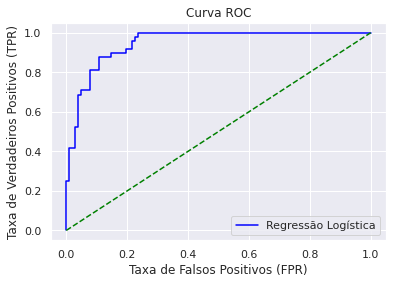

AUC:  0.9470996732026143
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       102
           2       0.74      0.88      0.80        48

    accuracy                           0.86       150
   macro avg       0.84      0.86      0.85       150
weighted avg       0.87      0.86      0.86       150

Classe Predita   1   2
Classe Real           
1               87  15
2                6  42


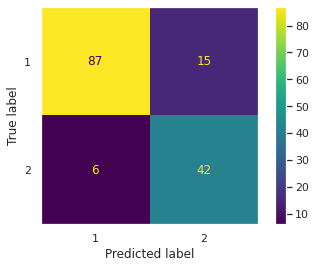

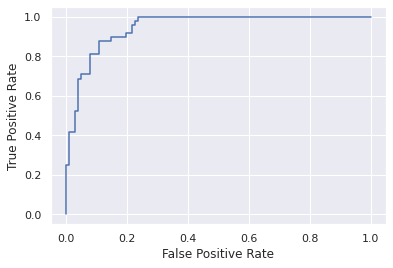

In [ ]:
#aplicando a regressão logística para estimação

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

#função para plotar o gráfico da curva ROC
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()


dados = pd.read_csv("/content/Vertebral.csv")
df_temp = pd.DataFrame(dados,columns=dados.columns[:-1])

x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'])

RL = LogisticRegression()
RL.fit(x_treino,y_treino)
predict = RL.predict(x_teste)

predict_prob = RL.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = roc_curve(y_teste, predict_prob,pos_label=2)
plot_roc_curve(fpr,tpr,'blue',"Regressão Logística")
print("AUC: ",metrics.auc(fpr,tpr))


print(classification_report(y_teste, predict))

confusion_matrix = pd.crosstab(y_teste, predict, rownames=['Classe Real'], colnames=['Classe Predita'])
print(confusion_matrix)
#sn.heatmap(confusion_matrix, annot=True, cbar=False)

ConfusionMatrixDisplay.from_estimator(RL,x_teste,y_teste)
plt.grid(False)
plt.show()

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()




